In [2]:
#LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from PIL import Image
import pandas as pd
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
SIZE = 128

In [3]:
#define train set of pictures
train_images = []
train_labels = []

for directory_path in glob.glob("train-yolo11-7/*"): 
    label = directory_path.split("\\")[-1]   #extract the labels from the picture
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)  #add images to train_images list
        train_labels.append(label)  #add labels for train_labels list
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)



In [4]:
# test set of images  
test_images = []
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("tests/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)
#print(test_images)
#print(test_labels)

In [5]:
#Encode labels from text (folder names) to integers.
le = preprocessing.LabelEncoder() #function used from text to integer
le.fit(test_labels)#assigns a integer to each label test
print(test_labels)
test_labels_encoded = le.transform(test_labels)#transform to integer
le.fit(train_labels)#assigns a integer to each label train
train_labels_encoded = le.transform(train_labels) #transform to integer

#define the train and test sets
print(train_labels_encoded)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

['0 - adenoma' '0 - adenoma' '0 - adenoma' '0 - adenoma' '0 - adenoma'
 '0 - adenoma' '0 - adenoma' '0 - adenoma' '0 - adenoma' '0 - adenoma'
 '0 - adenoma' '0 - adenoma' '0 - adenoma' '0 - adenoma' '1 - hyperplasic'
 '1 - hyperplasic' '1 - hyperplasic' '1 - hyperplasic' '1 - hyperplasic'
 '1 - hyperplasic' '1 - hyperplasic' '1 - hyperplasic']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame() #empty pandas dataset to save extracted features
    for image in range(dataset.shape[0]):  #iterate through each file 
        
        df = pd.DataFrame()  #for each image save dataframe
        
        img = dataset[image, :,:]
    #START ADDING DATA TO THE DATAFRAME                
         #Full image
         #GLCM distance 1, angle 0
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        #GLCM distance 1, angle pi/4
        GLCMa = graycomatrix(img, [1], [np.pi/4])       
        GLCM_Energya = graycoprops(GLCMa, 'energy')[0]
        df['Energy'] = GLCM_Energya
        GLCM_corra = graycoprops(GLCMa, 'correlation')[0]
        df['Corr'] = GLCM_corra       
        GLCM_dissa = graycoprops(GLCMa, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_dissa      
        GLCM_homa = graycoprops(GLCMa, 'homogeneity')[0]
        df['Homogen'] = GLCM_homa       
        GLCM_contra = graycoprops(GLCMa, 'contrast')[0]
        df['Contrast'] = GLCM_contra

        #GLCM distance 1, angle pi/2
        GLCMb = graycomatrix(img, [1], [np.pi/2])       
        GLCM_Energyb = graycoprops(GLCMb, 'energy')[0]
        df['Energy'] = GLCM_Energyb
        GLCM_corrb = graycoprops(GLCMb, 'correlation')[0]
        df['Corr'] = GLCM_corrb       
        GLCM_dissb = graycoprops(GLCMb, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_dissb      
        GLCM_homb = graycoprops(GLCMb, 'homogeneity')[0]
        df['Homogen'] = GLCM_homb       
        GLCM_contrb = graycoprops(GLCMb, 'contrast')[0]
        df['Contrast'] = GLCM_contrb

        #GLCM distance 1, angle 3pi/4
        GLCMc = graycomatrix(img, [1], [3*(np.pi/4)])       
        GLCM_Energyc = graycoprops(GLCMc, 'energy')[0]
        df['Energy'] = GLCM_Energyc
        GLCM_corrc = graycoprops(GLCMc, 'correlation')[0]
        df['Corr'] = GLCM_corrc       
        GLCM_dissc = graycoprops(GLCMc, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_dissc      
        GLCM_homc = graycoprops(GLCMc, 'homogeneity')[0]
        df['Homogen'] = GLCM_homc       
        GLCM_contrc = graycoprops(GLCMc, 'contrast')[0]
        df['Contrast'] = GLCM_contrc
        
        #GLCM distance 2, angle 0
        GLCM1 = graycomatrix(img, [2], [0])       
        GLCM_Energy1 = graycoprops(GLCM1, 'energy')[0]
        df['Energy'] = GLCM_Energy1
        GLCM_corr1 = graycoprops(GLCM1, 'correlation')[0]
        df['Corr'] = GLCM_corr1       
        GLCM_diss1 = graycoprops(GLCM1, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss1       
        GLCM_hom1 = graycoprops(GLCM1, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom1       
        GLCM_contr1 = graycoprops(GLCM1, 'contrast')[0]
        df['Contrast'] = GLCM_contr1

        #GLCM distance 2, angle pi/4
        GLCM1a = graycomatrix(img, [2], [np.pi/4])       
        GLCM_Energy1a = graycoprops(GLCM1a, 'energy')[0]
        df['Energy'] = GLCM_Energy1a
        GLCM_corr1a = graycoprops(GLCM1a, 'correlation')[0]
        df['Corr'] = GLCM_corr1a       
        GLCM_diss1a = graycoprops(GLCM1a, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss1a      
        GLCM_hom1a = graycoprops(GLCM1a, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom1a       
        GLCM_contr1a = graycoprops(GLCM1a, 'contrast')[0]
        df['Contrast'] = GLCM_contr1a

        #GLCM distance 2, angle pi/2
        GLCM1b = graycomatrix(img, [2], [np.pi/2])       
        GLCM_Energy1b = graycoprops(GLCM1b, 'energy')[0]
        df['Energy'] = GLCM_Energy1b
        GLCM_corr1b = graycoprops(GLCM1b, 'correlation')[0]
        df['Corr'] = GLCM_corr1b       
        GLCM_diss1b = graycoprops(GLCM1b, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss1b      
        GLCM_hom1b = graycoprops(GLCM1b, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom1b       
        GLCM_contr1b = graycoprops(GLCM1b, 'contrast')[0]
        df['Contrast'] = GLCM_contr1b

        #GLCM distance 2, angle 3pi/4
        GLCM1c = graycomatrix(img, [2], [3*(np.pi/4)])       
        GLCM_Energy1c = graycoprops(GLCM1c, 'energy')[0]
        df['Energy'] = GLCM_Energy1c
        GLCM_corr1c = graycoprops(GLCM1c, 'correlation')[0]
        df['Corr'] = GLCM_corr1c       
        GLCM_diss1c = graycoprops(GLCM1c, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss1c      
        GLCM_hom1c = graycoprops(GLCM1c, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom1c       
        GLCM_contr1c = graycoprops(GLCM1c, 'contrast')[0]
        df['Contrast'] = GLCM_contr1c

        #GLCM distance 3, angle 0
        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        #GLCM distance 3, angle pi/4
        GLCM2a = graycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy2a = graycoprops(GLCM2a, 'energy')[0]
        df['Energy'] = GLCM_Energy2a
        GLCM_corr2a = graycoprops(GLCM2a, 'correlation')[0]
        df['Corr'] = GLCM_corr2a       
        GLCM_diss2a = graycoprops(GLCM2a, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss2a      
        GLCM_hom2a = graycoprops(GLCM2a, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom2a       
        GLCM_contr2a = graycoprops(GLCM2a, 'contrast')[0]
        df['Contrast'] = GLCM_contr2a

        #GLCM distance 3, angle pi/2
        GLCM2b = graycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy2b = graycoprops(GLCM2b, 'energy')[0]
        df['Energy'] = GLCM_Energy2b
        GLCM_corr2b = graycoprops(GLCM2b, 'correlation')[0]
        df['Corr'] = GLCM_corr2b       
        GLCM_diss2b = graycoprops(GLCM2b, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss2b      
        GLCM_hom2b = graycoprops(GLCM2b, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom2b       
        GLCM_contr2b = graycoprops(GLCM2b, 'contrast')[0]
        df['Contrast'] = GLCM_contr2b

        #GLCM distance 3, angle 3pi/4
        GLCM2c = graycomatrix(img, [3], [3*(np.pi/4)])       
        GLCM_Energy2c = graycoprops(GLCM2c, 'energy')[0]
        df['Energy'] = GLCM_Energy2c
        GLCM_corr2c = graycoprops(GLCM2c, 'correlation')[0]
        df['Corr'] = GLCM_corr2c       
        GLCM_diss2c = graycoprops(GLCM2c, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss2c      
        GLCM_hom2c = graycoprops(GLCM2c, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom2c       
        GLCM_contr2c = graycoprops(GLCM2c, 'contrast')[0]
        df['Contrast'] = GLCM_contr2c

        #GLCM distance 4, angle 0
        GLCM4 = graycomatrix(img, [4], [0])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4

        #GLCM distance 4, angle pi/4
        GLCM4a = graycomatrix(img, [4], [np.pi/4])       
        GLCM_Energy4a = graycoprops(GLCM4a, 'energy')[0]
        df['Energy'] = GLCM_Energy4a
        GLCM_corr4a = graycoprops(GLCM4a, 'correlation')[0]
        df['Corr'] = GLCM_corr4a       
        GLCM_diss4a = graycoprops(GLCM4a, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss4a      
        GLCM_hom4a = graycoprops(GLCM4a, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom4a       
        GLCM_contr4a = graycoprops(GLCM4a, 'contrast')[0]
        df['Contrast'] = GLCM_contr4a

        #GLCM distance 4, angle pi/2
        GLCM4b = graycomatrix(img, [4], [np.pi/2])       
        GLCM_Energy4b = graycoprops(GLCM4b, 'energy')[0]
        df['Energy'] = GLCM_Energy4b
        GLCM_corr4b = graycoprops(GLCM4b, 'correlation')[0]
        df['Corr'] = GLCM_corr4b       
        GLCM_diss4b = graycoprops(GLCM4b, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss4b      
        GLCM_hom4b = graycoprops(GLCM4b, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom4b       
        GLCM_contr4b = graycoprops(GLCM4b, 'contrast')[0]
        df['Contrast'] = GLCM_contr4b

        #GLCM distance 4, angle 3pi/4
        GLCM4c = graycomatrix(img, [4], [3*(np.pi/4)])       
        GLCM_Energy4c = graycoprops(GLCM4c, 'energy')[0]
        df['Energy'] = GLCM_Energy4c
        GLCM_corr4c = graycoprops(GLCM4c, 'correlation')[0]
        df['Corr'] = GLCM_corr4c       
        GLCM_diss4c = graycoprops(GLCM4c, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss4c      
        GLCM_hom4c = graycoprops(GLCM4c, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom4c       
        GLCM_contr4c = graycoprops(GLCM4c, 'contrast')[0]
        df['Contrast'] = GLCM_contr4c

        #GLCM distance 5, angle 0
        GLCM5 = graycomatrix(img, [5], [0])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy4'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast'] = GLCM_contr5

        #GLCM distance 5, angle pi/4
        GLCM5a = graycomatrix(img, [5], [np.pi/4])       
        GLCM_Energy5a = graycoprops(GLCM5a, 'energy')[0]
        df['Energy'] = GLCM_Energy5a
        GLCM_corr5a = graycoprops(GLCM5a, 'correlation')[0]
        df['Corr'] = GLCM_corr5a       
        GLCM_diss5a = graycoprops(GLCM5a, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss5a      
        GLCM_hom5a = graycoprops(GLCM5a, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom5a       
        GLCM_contr5a = graycoprops(GLCM5a, 'contrast')[0]
        df['Contrast'] = GLCM_contr5a

        #GLCM distance 5, angle pi/2
        GLCM5b = graycomatrix(img, [5], [np.pi/2])       
        GLCM_Energy5b = graycoprops(GLCM5b, 'energy')[0]
        df['Energy'] = GLCM_Energy5b
        GLCM_corr5b = graycoprops(GLCM5b, 'correlation')[0]
        df['Corr'] = GLCM_corr5b       
        GLCM_diss5b = graycoprops(GLCM5b, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss5b      
        GLCM_hom5b = graycoprops(GLCM5b, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom5b       
        GLCM_contr5b = graycoprops(GLCM5b, 'contrast')[0]
        df['Contrast'] = GLCM_contr5b

        #GLCM distance 5, angle 3pi/4
        GLCM5c = graycomatrix(img, [5], [3*(np.pi/4)])       
        GLCM_Energy5c = graycoprops(GLCM5c, 'energy')[0]
        df['Energy'] = GLCM_Energy5c
        GLCM_corr5c = graycoprops(GLCM5c, 'correlation')[0]
        df['Corr'] = GLCM_corr5c       
        GLCM_diss5c = graycoprops(GLCM5c, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss5c      
        GLCM_hom5c = graycoprops(GLCM5c, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom5c       
        GLCM_contr5c = graycoprops(GLCM5c, 'contrast')[0]
        df['Contrast'] = GLCM_contr5

        image_dataset = pd.concat([image_dataset, df], axis=0)#combine extracted data
        
    return image_dataset

In [7]:
image_features = feature_extractor(x_train) #extract features from train set
#print(x_train)
X_for_ML =image_features
#print(X_for_ML)

In [8]:
#use lgbm light gradient boosting method
d_train = lgb.Dataset(X_for_ML, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'binary',
              'metric': 'binary_logloss',
              'num_leaves':1000,
              'max_depth':100,
              }  #parameters for binary classification (2 classes: adenoma and hyperplasic)


lgb_model = lgb.train(lgbm_params, d_train, 100) #100 iterations


[LightGBM] [Info] Number of positive: 40, number of negative: 69
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 109, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366972 -> initscore=-0.545227
[LightGBM] [Info] Start training from score -0.545227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [9]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
#print(x_test)

test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))
#print(test_for_RF)
#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
#test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get the original labels back. 
test_predictionlb = (test_prediction > 0.5).astype(int) 
test_predictionlb = le.inverse_transform(test_predictionlb)
#print(test_features)
i=0
while i<len(test_predictionlb):
    print("The ground truth is", test_labels[i], "the prediction is", test_predictionlb[i])
    i=i+1
#print(test_prediction)

The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 0 - adenoma the prediction is 1 - hyperplasic
The ground truth is 0 - adenoma the prediction is 0 - adenoma
The ground truth is 1 - hyperplasic the prediction is 1 - hyperplasic
The ground truth is 1 - hyperplasic the prediction is 0 - 

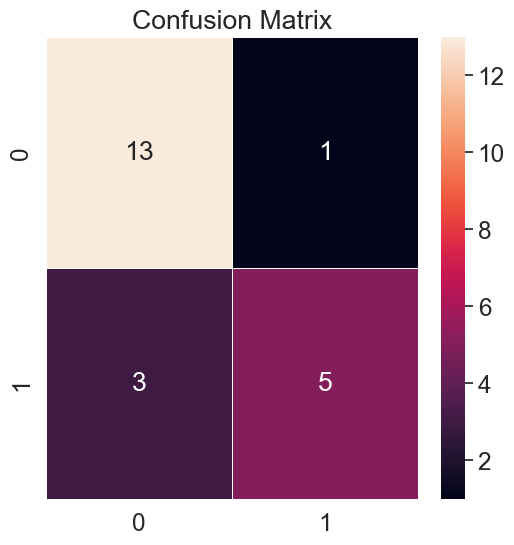

True Negatives (TN): 13
True Positives (TP): 5
False Negatives (FN): 3
False Positives (FP): 1
Accuracy: 0.8181818181818182


In [14]:
cm = confusion_matrix(test_labels, test_predictionlb) #calcule the confusion matrix using the premade function scikit.learn
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
plt.title("Confusion Matrix")
plt.show()
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#print the values of the matrxi
print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("False Positives (FP):", FP)

#Calculate accuracy of the model with metrics.accuracy_score scikir.learn library
accuracy = accuracy_score(test_labels, test_predictionlb)
print("Accuracy:", accuracy)

F1-Score: 0.7142857142857143


c:\Users\juana\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\juana\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


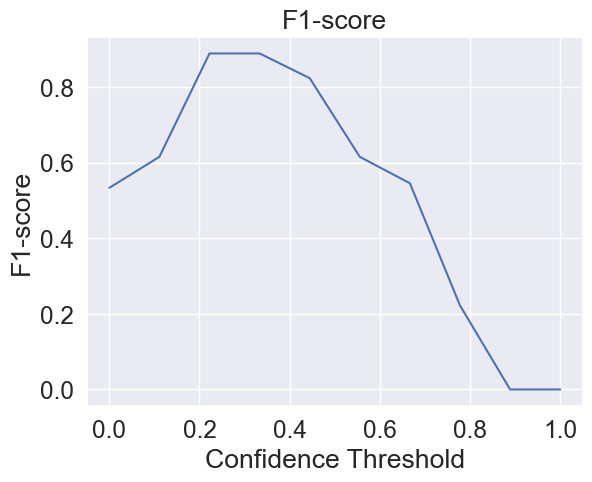

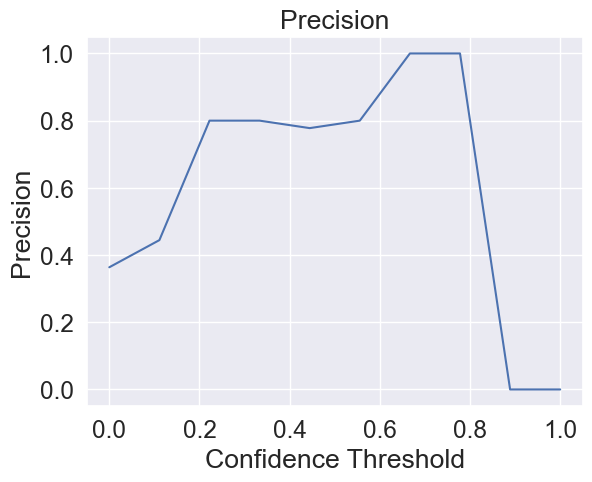

1.0
0.6666666666666666


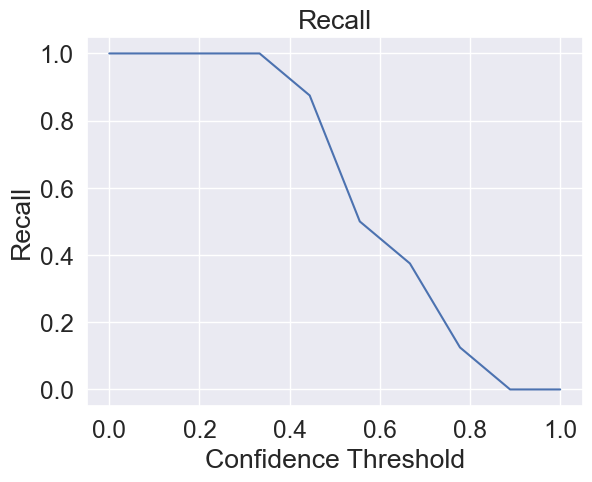

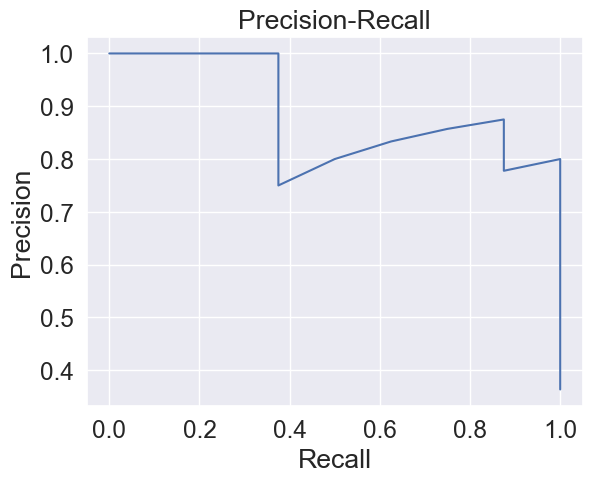

In [23]:
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)   #from labels to numbers
#print(test_labels_encoded)
test_predictionlb_encoded = label_encoder.fit_transform(test_predictionlb)  #from label to numbers predictions
#print(test_predictionlb_encoded)

#Calculate the f1 score
f1 = f1_score(test_labels_encoded, test_predictionlb_encoded, pos_label=label_encoder.transform(['1 - hyperplasic'])[0])  #f1 score calcules. ground truth + predictions and define the positive class
print("F1-Score:", f1)
N = 10#100
confidence_thresholds = np.linspace(0, 1, N)   #ten values for thershold in the range 0-1
f1_scores = []
precision_scores = []
recall_scores = []
pr_curve = []

for threshold in confidence_thresholds:
    binary_predictions = (test_prediction >= threshold).astype(int)  #if the prediction is bigger or the same as the threshold assigns a positive prediction (1) or a negative one (0)
    f1 = f1_score(test_labels_encoded, binary_predictions, pos_label=label_encoder.transform(['1 - hyperplasic'])[0]) #calculate F1-score with the binary predictions.
    f1_scores.append(f1) #generates a list of f1 values for all the thresholds
    precision = precision_score(test_labels_encoded, binary_predictions) #calculate precision with premade funcition scikit.metrics
    recall = recall_score(test_labels_encoded, binary_predictions) #calculate recall with premade funcition scikit.metrics
    precision_scores.append(precision) #save in precision list
    recall_scores.append(recall)  #save in recall list

plt.plot(confidence_thresholds, f1_scores)
plt.xlabel("Confidence Threshold")
plt.ylabel("F1-score")
plt.title("F1-score")
plt.show()

plt.plot(confidence_thresholds, precision_scores)
plt.xlabel("Confidence Threshold")
plt.ylabel("Precision")
plt.title("Precision")
plt.show()
#print(max(precision_scores))
max_precision_index = precision_scores.index(max(precision_scores))
max_precision_threshold = confidence_thresholds[max_precision_index]
#print(max_precision_threshold)

plt.plot(confidence_thresholds, recall_scores)
plt.xlabel("Confidence Threshold")
plt.ylabel("Recall")
plt.title("Recall")
plt.show()

precision, recall, _ = precision_recall_curve(test_labels_encoded, test_prediction)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.show()